In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("MSFT.csv")

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-07,249.979996,254.089996,249.809998,253.809998,251.754288,23079200
1,2021-06-08,255.160004,256.010010,252.509995,252.570007,250.524353,22455000
2,2021-06-09,253.809998,255.529999,253.210007,253.589996,251.536072,17937600
3,2021-06-10,254.289993,257.459991,253.669998,257.239990,255.156509,24563600
4,2021-06-11,257.989990,258.489990,256.609985,257.890015,255.801254,18999700


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,297.265415,300.217431,293.866719,297.208300,295.765134,2.926120e+07
std,23.167453,23.026148,23.094445,23.051496,22.943377,1.110086e+07
min,249.979996,254.089996,246.440002,252.559998,250.524353,1.390020e+07
25%,282.119995,286.420013,278.529999,281.029999,280.067688,2.185340e+07
50%,296.220001,298.720001,293.489990,296.029999,294.732697,2.720930e+07
75%,309.630005,312.380005,306.459991,310.200012,308.833160,3.426400e+07
max,344.619995,349.670013,342.200012,343.109985,341.606384,9.042890e+07


In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
import matplotlib.pyplot as plt

In [18]:
df.Date

0      2021-06-07
1      2021-06-08
2      2021-06-09
3      2021-06-10
4      2021-06-11
          ...    
248    2022-05-31
249    2022-06-01
250    2022-06-02
251    2022-06-03
252    2022-06-06
Name: Date, Length: 253, dtype: object

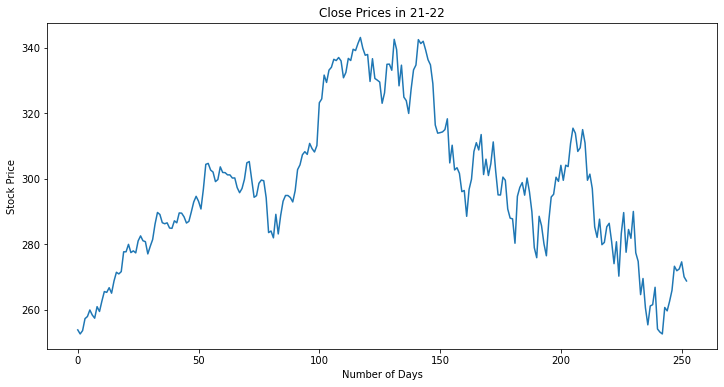

In [19]:
plt.figure(figsize = (12, 6))
plt.title("Close Prices in 21-22")
plt.xlabel("Number of Days")
plt.ylabel("Stock Price")
plt.plot(df.Close)

In [20]:
import seaborn as sns

In [22]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993790,0.991221,0.981903,0.981882,-0.043146
High,0.993790,1.000000,0.989507,0.990821,0.991699,-0.004954
Low,0.991221,0.989507,1.000000,0.991315,0.989924,-0.116917
Close,0.981903,0.990821,0.991315,1.000000,0.999591,-0.065981
Adj Close,0.981882,0.991699,0.989924,0.999591,1.000000,-0.054447
Volume,-0.043146,-0.004954,-0.116917,-0.065981,-0.054447,1.000000


<AxesSubplot:>

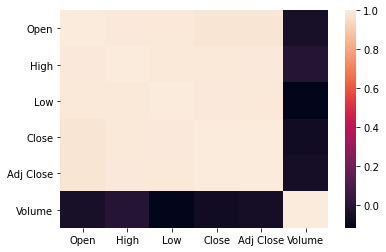

In [23]:
sns.heatmap(df.corr())

In [37]:
x = df[["Open", "High", "Low"]]
y = df.Close
x = x.to_numpy() ##to change from pandas datafram to numpy array
y = y.to_numpy()
type(x)
y = y.reshape(-1,1) ## -1 asks numpy to use the rows as it sees, 1 says use 1 column. 
## to make this compatible for matrix multiplication with x


In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [46]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data ={"Predicted Price": ypred} )
data.head()

,Predicted Price
0,308.760010
1,259.890015
2,286.220001
3,310.200012
4,341.250000


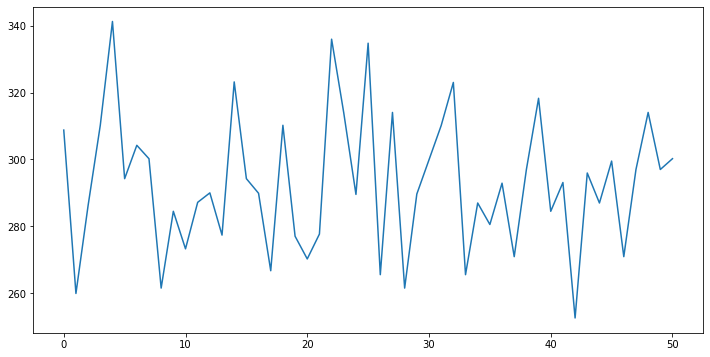

In [62]:
plt.figure(figsize = (12, 6))
#plt.title("Predicted Price for next 50 days")
#plt.xlabel("Days")
#plt.ylabel("Price")
plt.plot(ypred)